In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [6]:
##load csv 
df_real = pd.read_csv("../../../datasets/mediciones.csv",sep=';')
df_real = df_real.query("id_medidor==439950")
df = pd.read_csv("../results/data_forecasted.csv")

In [7]:
df_real

,Unnamed: 0,id_medidor,date,Consumo,Consumo Reactivo
0,0,439950,2020-02-01 00:15:00,466.352230,21.632
1,1,439950,2020-02-01 00:30:00,463.451780,20.944
2,2,439950,2020-02-01 00:45:00,461.775270,20.830
3,3,439950,2020-02-01 01:00:00,462.097530,21.186
4,4,439950,2020-02-01 01:15:00,460.127720,21.273
...,...,...,...,...,...
67202,67202,439950,2021-01-02 23:00:00,118.658005,NaN
67203,67203,439950,2021-01-02 23:15:00,117.040140,NaN
67204,67204,439950,2021-01-02 23:30:00,117.152380,NaN
67205,67205,439950,2021-01-02 23:45:00,118.480576,NaN


In [11]:
def change_format_date(data,type='H'):
    if type=='H':
        data['new_date'] = data['date'].dt.floor('H')
        new_frecuency = data.groupby(['new_date']).agg(
                kWh = ('Consumo','sum'),
                kW = ('Consumo','max')
        ).reset_index()
    return new_frecuency

In [13]:
df_real['date'] = pd.to_datetime(df_real['date'])

In [14]:
df_real = change_format_date(df_real)
df_real.head()

,new_date,kWh,kW
0,2020-01-01 00:00:00,466.605700,117.276955
1,2020-01-01 01:00:00,459.570084,115.484550
2,2020-01-01 02:00:00,463.111413,116.578094
3,2020-01-01 03:00:00,459.425244,116.491196
4,2020-01-01 04:00:00,460.703461,116.686720


In [16]:
#sort values 
df_real = df_real.sort_values("new_date")

In [24]:
df_real['tipo'] = "real"
df['tipo'] = "forecasted"

In [32]:
df_real = df_real.rename(columns={
    'new_date' : 'date'
})

df = df.rename(columns={
    'predict' : 'kWh'
})

In [35]:
df_real = df_real[['date','kWh','tipo']]
df = df[['date','kWh','tipo']]

In [37]:
all_data = pd.concat([df_real,df],axis=0).reset_index()

<Axes: xlabel='date', ylabel='kWh'>

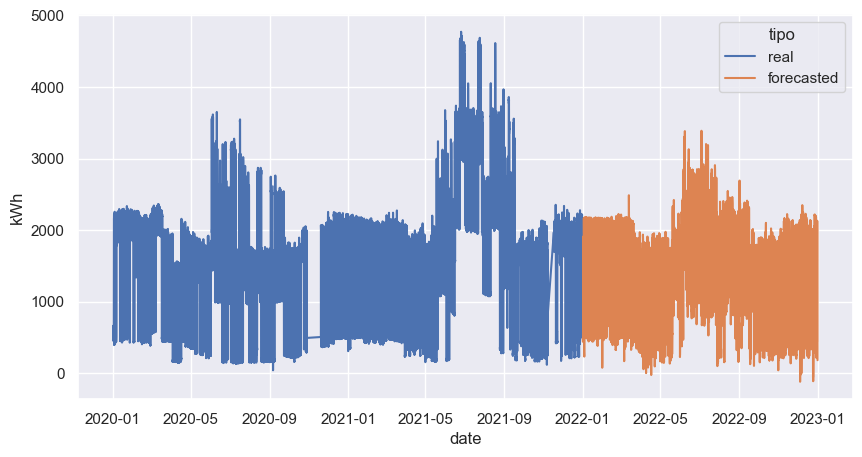

In [49]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(all_data,x='date',y='kWh',hue='tipo')